# Ejemplo

- EDP advección lineal + cond contorno periódicas
- MDF Euler Explícito + Aguas Arriba

In [10]:
function MDF_aguas_arriba(x, t, u0, beta)
    Nx = length(x)
    a = x[1]
    b = x[end]
    dx = x[2]-x[1]
    Nt = length(t)
    T = t[end]
    dt = t[2]-t[1]
    
    u = zeros(Float64, (Nx, Nt)) # Matriz Nx filas, Nt columnas (u^n_i)
    u[:,1] = u0 # Condición inicial
    cfl = beta*dt/dx # Condición CFL, debe ser <1
    println("CFL = $cfl")
    
    for n = 1:Nt-1
        u[1, n+1] = u[end, n]  # cond. contorno periódica
        for i = 2:Nx  # MDF aguas arriba
            u[i,n+1] = u[i,n] - cfl*(u[i,n]-u[i-1,n])
        end
    end

    return u
end

MDF_aguas_arriba (generic function with 1 method)

In [16]:
a, b = 0, 1
x = LinRange(a, b, 20)
t = LinRange(0, 1, 40)
u0 = exp.( -20*(x.-(a+b)/2).^2 )
beta = 1
u = MDF_aguas_arriba(x, t, u0, beta)

CFL = 0.48717948717948717


20×40 Array{Float64,2}:
 0.00673795  0.00673795  0.0123537   …  0.134884  0.120454  0.11176
 0.018265    0.0126492   0.00976938     0.187867  0.162055  0.141788
 0.0443189   0.031626    0.0223809      0.261971  0.225869  0.19478
 0.0962583   0.0709545   0.0517944      0.352496  0.308394  0.26819
 0.18714     0.142864    0.107831       0.451586  0.403312  0.35707
 0.325666    0.258179    0.202       …  0.548417  0.501243  0.453533
 0.507291    0.418807    0.340552       0.630519  0.590521  0.547026
 0.707328    0.609874    0.51679        0.686063  0.659003  0.62564
 0.882803    0.797315    0.705998       0.706469  0.696528  0.678246
 0.986245    0.93585     0.868359       0.688494  0.697251  0.696899
 0.986245    0.986245    0.961694    …  0.635051  0.661088  0.678706
 0.882803    0.933198    0.959041       0.554462  0.593723  0.626542
 0.707328    0.792816    0.861207       0.458429  0.505214  0.548334
 0.507291    0.604745    0.696369       0.359438  0.407664  0.455189
 0.325666    0.

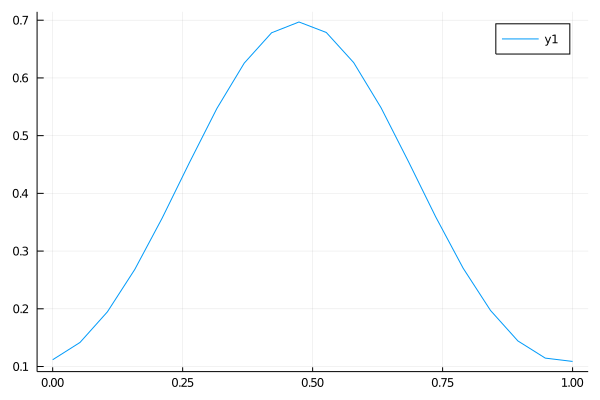

In [24]:
using Plots
plot(x, u[:,40])

┌ Info: Saved animation to 
│   fn = /tmp/anim_fps15.gif
└ @ Plots /home/rrgalvan/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/tmp/anim_fps15.gif")
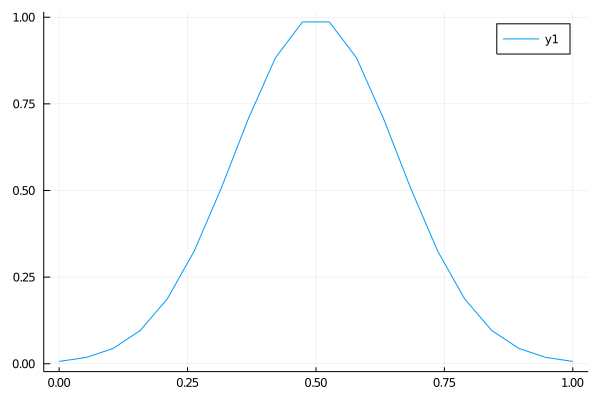

In [26]:
anim = @animate for n ∈ 1:size(u, 2)
    plot(x, u[:,n])
end
gif(anim, "/tmp/anim_fps15.gif", fps = 15)